In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
from tops.config import instantiate
import pathlib
from ssd.utils import load_config
from plot_utils import plot

In [2]:
task23_iteration1_logs = tops.logger.read_logs(pathlib.Path("/work/snotra/adtan/ssd_outputs/task23_iteration1/"))
task23_iteration2_logs = tops.logger.read_logs(pathlib.Path("/work/snotra/adtan/ssd_outputs/task23_iteration2/"))
task23_iteration3_logs = tops.logger.read_logs(pathlib.Path("/work/snotra/adtan/ssd_outputs/task23_iteration3/"))

list_of_logs = [task23_iteration1_logs, task23_iteration2_logs, task23_iteration3_logs]
labels = ["Task 2.3 iteration 1", "Task 2.3 iteration 2", "Task 2.3 iteration 3"]

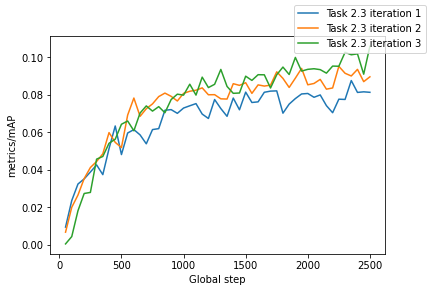

In [3]:
# plot mAP@0.5:0.95
fig, ax = plot(list_of_logs, labels, "metrics/mAP")
fig.legend()

In [4]:
print("Highest mAP@0.5:0.95 reach for Task 2.3 iteration3: ", max([entry["metrics/mAP"] for entry in task23_iteration3_logs if "metrics/mAP" in entry]))

Highest mAP@0.5:0.95 reach for Task 2.3 iteration3:  0.1059976223408021


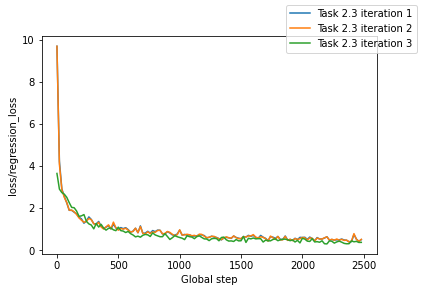

In [5]:
# plot regression loss
fig, ax = plot(list_of_logs, labels, "loss/regression_loss")
fig.legend()

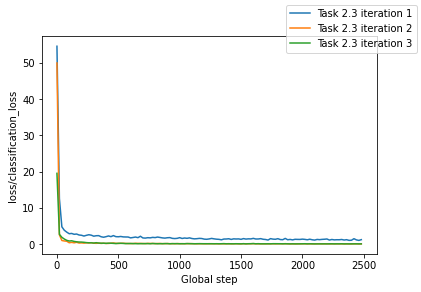

In [6]:
# plot classification loss
fig, ax = plot(list_of_logs, labels, "loss/classification_loss")
fig.legend()

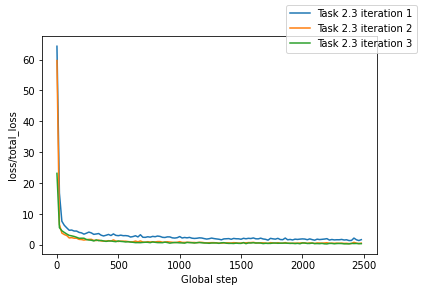

In [7]:
# plot total loss
fig, ax = plot(list_of_logs, labels, "loss/total_loss")
fig.legend()

In [8]:
cfg = load_config("../configs/task23_iteration3.py")
model = instantiate(cfg.model)

num_parameters = sum(p.numel() for p in model.parameters())
num_trainable_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Total number of parameters: ", num_parameters)
print("Total number of trainable parameters: ", num_trainable_parameters)

NOTE! Installing ujson may make loading annotations faster.
It looks like you are currently working on the server, with a 'working directory' in: /work/snotra/adtan
Saving all SSD outputs to: /work/snotra/adtan/ssd_outputs
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/train_annotations.json
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/val_annotations.json
Total number of parameters:  60388662
Total number of trainable parameters:  60126582


In [9]:
%cd ../configs

/home/adtan/project/assignment4/SSD/configs


In [10]:
!python ../runtime_analysis.py task23_iteration3.py

NOTE! Installing ujson may make loading annotations faster.
It looks like you are currently working on the server, with a 'working directory' in: /work/snotra/adtan
Saving all SSD outputs to: /work/snotra/adtan/ssd_outputs
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/train_annotations.json
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/val_annotations.json
2022-05-07 18:22:38,646 [INFO ] Loaded checkpoint from /work/snotra/adtan/ssd_outputs/task23_iteration3/checkpoints/2500.ckpt
Traceback (most recent call last):
  File "../runtime_analysis.py", line 46, in <module>
    main()
  File "/opt/conda/lib/python3.8/site-packages/click/core.py", line 1128, in __call__
    return self.main(*args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/click/core.py", line 1053, in main
    rv = self.invoke(ctx)
  File "/opt/conda/lib/python3.8/site-packages/click/core.py"